In [8]:
import os
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [6]:
DATASET_PATH = "D:/American_Sign_Language/asl_alphabet_train/asl_alphabet_train"
OUTPUT_CSV = "processed_landmarks.csv"
LABELS = sorted(os.listdir(DATASET_PATH))  # Assumes A, B, C...

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True)
data = []

for label in LABELS:
    label_dir = os.path.join(DATASET_PATH, label)
    count=0
    for img_file in os.listdir(label_dir):
        count+=1
        img_path = os.path.join(label_dir, img_file)
        image = cv2.imread(img_path)
        if image is None:
            continue

        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        result = hands.process(image_rgb)

        if result.multi_hand_landmarks:
            for hand_landmarks in result.multi_hand_landmarks:
                landmarks = []
                for lm in hand_landmarks.landmark:
                    landmarks.extend([lm.x, lm.y, lm.z])
                landmarks.append(label)  # Append the class label
                data.append(landmarks)
                break  # One hand only
    print(f"{label}:{count} Successful")
df = pd.DataFrame(data)
df.to_csv(OUTPUT_CSV, index=False)
print(f"Landmarks saved to {OUTPUT_CSV}")

A:3000 Successful
B:3000 Successful
C:3000 Successful
D:3000 Successful
E:3000 Successful
F:3000 Successful
G:3000 Successful
H:3000 Successful
I:3000 Successful
J:3000 Successful
K:3000 Successful
L:3000 Successful
M:3000 Successful
N:3000 Successful
O:3000 Successful
P:3000 Successful
Q:3000 Successful
R:3000 Successful
S:3000 Successful
T:3000 Successful
U:3000 Successful
V:3000 Successful
W:3000 Successful
X:3000 Successful
Y:3000 Successful
Z:3000 Successful
del:3000 Successful
nothing:3000 Successful
space:3000 Successful
Landmarks saved to processed_landmarks.csv


In [9]:
df = pd.read_csv("processed_landmarks.csv")

# Features and Labels
X = df.iloc[:, :-1].values  # All landmark coordinates
y = df.iloc[:, -1].values   # Class labels (A-Z)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the labels (e.g., 'A' → 0, 'B' → 1, ...)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [11]:
num_classes = len(le.classes_)
y_train_oh = to_categorical(y_train, num_classes)
y_test_oh = to_categorical(y_test, num_classes)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(63,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(
    X_train, y_train_oh,
    epochs=20,
    batch_size=64,
    validation_split=0.1
)

c:\Users\HP\Desktop\American_Sign_Language_Detection\venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 29)             │         1,885 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,333 (71.61 KB)

 Trainable params: 18,333 (71.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4910 - loss: 1.7981 - val_accuracy: 0.9569 - val_loss: 0.1919
Epoch 2/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9119 - loss: 0.3022 - val_accuracy: 0.9696 - val_loss: 0.1242
Epoch 3/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9406 - loss: 0.2098 - val_accuracy: 0.9716 - val_loss: 0.1008
Epoch 4/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9528 - loss: 0.1687 - val_accuracy: 0.9779 - val_loss: 0.0861
Epoch 5/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9590 - loss: 0.1481 - val_accuracy: 0.9789 - val_loss: 0.0773
Epoch 6/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9595 - loss: 0.1408 - val_accuracy: 0.9826 - val_loss: 0.0707
Epoch 7/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9643 - loss: 0.1299 - val_accuracy: 0.9822 - val_loss: 0.0688
Epoch 8/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9662 - loss: 0.1199 - val_accuracy: 0.

In [12]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_oh)
print(f"Test Accuracy: {test_accuracy:.2f}")


399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9875 - loss: 0.0417
Test Accuracy: 0.99


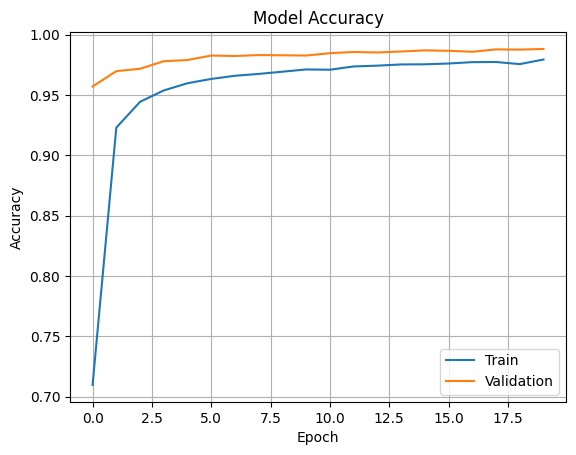

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


In [14]:
model.save("sign_model.h5")

import pickle
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
